In [1]:
import pandas as pd
from rdkit import Chem
from tqdm import tqdm
import os
import openai
import datetime
import numpy as np
import time

def molToCanonical(smiles):
    mol = Chem.MolFromSmiles(smiles)
    canonical_smiles = Chem.MolToSmiles(mol)
    return canonical_smiles

from steamship import Steamship

In [95]:
openai.api_key = 'TODO: Please input your OpenAI API Key'

In [96]:
file = 'data/reaction_prediction/uspto_mixed.pickle'

# Read data

In [97]:
df = pd.read_pickle(file)

In [98]:
df['reactants_smiles'] = df['reactants_mol'].apply(lambda x: Chem.MolToSmiles(x))
df['products_smiles'] = df['products_mol'].apply(lambda x: Chem.MolToSmiles(x))

In [99]:
train = df[df['set'] == 'train']
valid = df[df['set'] == 'valid']
test = df[df['set'] == 'test']

In [100]:
len(train)

409035

In [101]:
test = test.sample(500, random_state=42)

In [103]:
valid = valid.sample(30, random_state=42)

# compute the scafford of all training samples
train.iloc[0]['reactants_smiles']

'C1CCOC1.CC(C)C[Mg+].CON(C)C(=O)c1ccc(O)nc1.[Cl-]'

In [187]:
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import DataStructs
from rdkit.Chem import rdMolDescriptors
from tqdm import tqdm

def get_scaffold_fp(x):
    mol = Chem.MolFromSmiles(x)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold_fp = rdMolDescriptors.GetMorganFingerprint(scaffold, 2)
    return scaffold_fp

In [188]:
train['scaffold_fp'] = train['reactants_smiles'].apply(lambda x: get_scaffold_fp(x))

[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:49] WARNING: not removing hydrogen atom without neighbors
[15:03:50] WARNING: not removing hydrogen atom without neighbors
[15:03:50] WARNING: not r

[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not removing hydrogen atom without neighbors
[15:03:51] WARNING: not r

[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not removing hydrogen atom without neighbors
[15:03:53] WARNING: not r

[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not removing hydrogen atom without neighbors
[15:03:55] WARNING: not r

[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not removing hydrogen atom without neighbors
[15:03:58] WARNING: not r

[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not removing hydrogen atom without neighbors
[15:04:00] WARNING: not r

[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not removing hydrogen atom without neighbors
[15:04:02] WARNING: not r

[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not removing hydrogen atom without neighbors
[15:04:04] WARNING: not r

[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not removing hydrogen atom without neighbors
[15:04:05] WARNING: not r

[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] Unusual charge on atom 41 number of radical electrons set to zero
[15:04:07] WARNING: not removing hydrogen atom without neighbors
[15:04:07] WA

[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not removing hydrogen atom without neighbors
[15:04:09] WARNING: not r

[15:04:10] WARNING: not removing hydrogen atom without neighbors
[15:04:10] WARNING: not removing hydrogen atom without neighbors
[15:04:10] WARNING: not removing hydrogen atom without neighbors
[15:04:10] WARNING: not removing hydrogen atom without neighbors
[15:04:10] WARNING: not removing hydrogen atom without neighbors
[15:04:10] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not removing hydrogen atom without neighbors
[15:04:11] WARNING: not r

[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not removing hydrogen atom without neighbors
[15:04:12] WARNING: not r

[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not removing hydrogen atom without neighbors
[15:04:14] WARNING: not r

[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not removing hydrogen atom without neighbors
[15:04:16] WARNING: not r

[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not removing hydrogen atom without neighbors
[15:04:18] WARNING: not r

[15:04:19] WARNING: not removing hydrogen atom without neighbors
[15:04:19] WARNING: not removing hydrogen atom without neighbors
[15:04:19] WARNING: not removing hydrogen atom without neighbors
[15:04:19] WARNING: not removing hydrogen atom without neighbors
[15:04:19] WARNING: not removing hydrogen atom without neighbors
[15:04:19] WARNING: not removing hydrogen atom without neighbors
[15:04:19] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not removing hydrogen atom without neighbors
[15:04:20] WARNING: not r

[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not removing hydrogen atom without neighbors
[15:04:21] WARNING: not r

[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not removing hydrogen atom without neighbors
[15:04:23] WARNING: not r

[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not removing hydrogen atom without neighbors
[15:04:25] WARNING: not r

[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not removing hydrogen atom without neighbors
[15:04:26] WARNING: not r

[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not removing hydrogen atom without neighbors
[15:04:28] WARNING: not r

[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not removing hydrogen atom without neighbors
[15:04:30] WARNING: not r

[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not removing hydrogen atom without neighbors
[15:04:32] WARNING: not r

[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not removing hydrogen atom without neighbors
[15:04:34] WARNING: not r

[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not removing hydrogen atom without neighbors
[15:04:35] WARNING: not r

[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not removing hydrogen atom without neighbors
[15:04:37] WARNING: not r

[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not removing hydrogen atom without neighbors
[15:04:39] WARNING: not r

[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not removing hydrogen atom without neighbors
[15:04:41] WARNING: not r

[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not removing hydrogen atom without neighbors
[15:04:43] WARNING: not r

[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not removing hydrogen atom without neighbors
[15:04:45] WARNING: not r

[15:04:46] WARNING: not removing hydrogen atom without neighbors
[15:04:46] WARNING: not removing hydrogen atom without neighbors
[15:04:46] WARNING: not removing hydrogen atom without neighbors
[15:04:46] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not removing hydrogen atom without neighbors
[15:04:47] WARNING: not r

[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not removing hydrogen atom without neighbors
[15:04:49] WARNING: not r

[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not removing hydrogen atom without neighbors
[15:04:50] WARNING: not r

[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not removing hydrogen atom without neighbors
[15:04:54] WARNING: not r

[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not removing hydrogen atom without neighbors
[15:04:57] WARNING: not r

[15:04:59] WARNING: not removing hydrogen atom without neighbors
[15:04:59] WARNING: not removing hydrogen atom without neighbors
[15:04:59] WARNING: not removing hydrogen atom without neighbors
[15:04:59] WARNING: not removing hydrogen atom without neighbors
[15:04:59] WARNING: not removing hydrogen atom without neighbors
[15:04:59] WARNING: not removing hydrogen atom without neighbors
[15:04:59] WARNING: not removing hydrogen atom without neighbors
[15:04:59] WARNING: not removing hydrogen atom without neighbors
[15:05:00] WARNING: not removing hydrogen atom without neighbors
[15:05:00] WARNING: not removing hydrogen atom without neighbors
[15:05:00] WARNING: not removing hydrogen atom without neighbors
[15:05:00] WARNING: not removing hydrogen atom without neighbors
[15:05:00] WARNING: not removing hydrogen atom without neighbors
[15:05:00] WARNING: not removing hydrogen atom without neighbors
[15:05:00] WARNING: not removing hydrogen atom without neighbors
[15:05:00] WARNING: not r

[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not removing hydrogen atom without neighbors
[15:05:02] WARNING: not r

[15:05:05] WARNING: not removing hydrogen atom without neighbors
[15:05:05] WARNING: not removing hydrogen atom without neighbors
[15:05:05] WARNING: not removing hydrogen atom without neighbors
[15:05:05] WARNING: not removing hydrogen atom without neighbors
[15:05:06] WARNING: not removing hydrogen atom without neighbors
[15:05:06] WARNING: not removing hydrogen atom without neighbors
[15:05:06] WARNING: not removing hydrogen atom without neighbors
[15:05:06] WARNING: not removing hydrogen atom without neighbors
[15:05:06] WARNING: not removing hydrogen atom without neighbors
[15:05:06] WARNING: not removing hydrogen atom without neighbors
[15:05:06] WARNING: not removing hydrogen atom without neighbors
[15:05:06] WARNING: not removing hydrogen atom without neighbors
[15:05:06] WARNING: not removing hydrogen atom without neighbors
[15:05:07] WARNING: not removing hydrogen atom without neighbors
[15:05:07] WARNING: not removing hydrogen atom without neighbors
[15:05:07] WARNING: not r

[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:32] WARNING: not removing hydrogen atom without neighbors
[15:05:33] WARNING: not removing hydrogen atom without neighbors
[15:05:33] WARNING: not removing hydrogen atom without neighbors
[15:05:33] WARNING: not removing hydrogen atom without neighbors
[15:05:33] WARNING: not r

[15:05:36] WARNING: not removing hydrogen atom without neighbors
[15:05:36] WARNING: not removing hydrogen atom without neighbors
[15:05:36] WARNING: not removing hydrogen atom without neighbors
[15:05:36] WARNING: not removing hydrogen atom without neighbors
[15:05:36] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not removing hydrogen atom without neighbors
[15:05:37] WARNING: not r

[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not removing hydrogen atom without neighbors
[15:05:39] WARNING: not r

[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not removing hydrogen atom without neighbors
[15:05:41] WARNING: not r

[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:44] WARNING: not removing hydrogen atom without neighbors
[15:05:45] WARNING: not removing hydrogen atom without neighbors
[15:05:45] WARNING: not r

[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not removing hydrogen atom without neighbors
[15:05:47] WARNING: not r

[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not removing hydrogen atom without neighbors
[15:05:49] WARNING: not r

[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not removing hydrogen atom without neighbors
[15:05:51] WARNING: not r

[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not removing hydrogen atom without neighbors
[15:05:53] WARNING: not r

[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not removing hydrogen atom without neighbors
[15:05:55] WARNING: not r

[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not removing hydrogen atom without neighbors
[15:05:57] WARNING: not r

[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not removing hydrogen atom without neighbors
[15:05:59] WARNING: not r

[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:01] WARNING: not removing hydrogen atom without neighbors
[15:06:02] WARNING: not removing hydrogen atom without neighbors
[15:06:02] WARNING: not removing hydrogen atom without neighbors
[15:06:02] WARNING: not r

[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:17] WARNING: not removing hydrogen atom without neighbors
[15:06:18] WARNING: not r

[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not removing hydrogen atom without neighbors
[15:06:22] WARNING: not r

[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not removing hydrogen atom without neighbors
[15:06:24] WARNING: not r

[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not removing hydrogen atom without neighbors
[15:06:26] WARNING: not r

[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not removing hydrogen atom without neighbors
[15:06:28] WARNING: not r

[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not removing hydrogen atom without neighbors
[15:06:30] WARNING: not r

[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not removing hydrogen atom without neighbors
[15:06:32] WARNING: not r

[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not removing hydrogen atom without neighbors
[15:06:34] WARNING: not r

[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not removing hydrogen atom without neighbors
[15:06:36] WARNING: not r

[15:06:38] WARNING: not removing hydrogen atom without neighbors
[15:06:38] WARNING: not removing hydrogen atom without neighbors
[15:06:38] WARNING: not removing hydrogen atom without neighbors
[15:06:38] WARNING: not removing hydrogen atom without neighbors
[15:06:38] WARNING: not removing hydrogen atom without neighbors
[15:06:38] WARNING: not removing hydrogen atom without neighbors
[15:06:38] WARNING: not removing hydrogen atom without neighbors
[15:06:38] WARNING: not removing hydrogen atom without neighbors
[15:06:39] WARNING: not removing hydrogen atom without neighbors
[15:06:39] WARNING: not removing hydrogen atom without neighbors
[15:06:39] WARNING: not removing hydrogen atom without neighbors
[15:06:39] WARNING: not removing hydrogen atom without neighbors
[15:06:39] WARNING: not removing hydrogen atom without neighbors
[15:06:39] WARNING: not removing hydrogen atom without neighbors
[15:06:39] WARNING: not removing hydrogen atom without neighbors
[15:06:39] WARNING: not r

[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not removing hydrogen atom without neighbors
[15:06:40] WARNING: not r

[15:06:42] WARNING: not removing hydrogen atom without neighbors
[15:06:42] WARNING: not removing hydrogen atom without neighbors
[15:06:42] WARNING: not removing hydrogen atom without neighbors
[15:06:42] WARNING: not removing hydrogen atom without neighbors
[15:06:42] WARNING: not removing hydrogen atom without neighbors
[15:06:42] WARNING: not removing hydrogen atom without neighbors
[15:06:42] WARNING: not removing hydrogen atom without neighbors
[15:06:43] WARNING: not removing hydrogen atom without neighbors
[15:06:43] WARNING: not removing hydrogen atom without neighbors
[15:06:43] WARNING: not removing hydrogen atom without neighbors
[15:06:43] WARNING: not removing hydrogen atom without neighbors
[15:06:43] WARNING: not removing hydrogen atom without neighbors
[15:06:43] WARNING: not removing hydrogen atom without neighbors
[15:06:43] WARNING: not removing hydrogen atom without neighbors
[15:06:43] WARNING: not removing hydrogen atom without neighbors
[15:06:43] WARNING: not r

[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not removing hydrogen atom without neighbors
[15:06:45] WARNING: not r

[15:06:46] WARNING: not removing hydrogen atom without neighbors
[15:06:46] WARNING: not removing hydrogen atom without neighbors
[15:06:46] WARNING: not removing hydrogen atom without neighbors
[15:06:46] WARNING: not removing hydrogen atom without neighbors
[15:06:46] WARNING: not removing hydrogen atom without neighbors
[15:06:46] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not removing hydrogen atom without neighbors
[15:06:47] WARNING: not r

[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not removing hydrogen atom without neighbors
[15:06:49] WARNING: not r

[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not removing hydrogen atom without neighbors
[15:06:52] WARNING: not r

[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not removing hydrogen atom without neighbors
[15:06:54] WARNING: not r

[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not removing hydrogen atom without neighbors
[15:06:58] WARNING: not r

[15:07:01] WARNING: not removing hydrogen atom without neighbors
[15:07:01] WARNING: not removing hydrogen atom without neighbors
[15:07:01] WARNING: not removing hydrogen atom without neighbors
[15:07:01] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not removing hydrogen atom without neighbors
[15:07:02] WARNING: not r

[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not removing hydrogen atom without neighbors
[15:07:04] WARNING: not r

[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:05] WARNING: not removing hydrogen atom without neighbors
[15:07:06] WARNING: not removing hydrogen atom without neighbors
[15:07:06] WARNING: not removing hydrogen atom without neighbors
[15:07:06] WARNING: not r

[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not removing hydrogen atom without neighbors
[15:07:08] WARNING: not r

[15:07:10] WARNING: not removing hydrogen atom without neighbors
[15:07:10] WARNING: not removing hydrogen atom without neighbors
[15:07:10] WARNING: not removing hydrogen atom without neighbors
[15:07:10] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not removing hydrogen atom without neighbors
[15:07:11] WARNING: not r

[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not removing hydrogen atom without neighbors
[15:07:13] WARNING: not r

[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not removing hydrogen atom without neighbors
[15:07:15] WARNING: not r

[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not removing hydrogen atom without neighbors
[15:07:17] WARNING: not r

[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not removing hydrogen atom without neighbors
[15:07:19] WARNING: not r

[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not removing hydrogen atom without neighbors
[15:07:21] WARNING: not r

[15:07:23] WARNING: not removing hydrogen atom without neighbors
[15:07:23] WARNING: not removing hydrogen atom without neighbors
[15:07:23] WARNING: not removing hydrogen atom without neighbors
[15:07:23] WARNING: not removing hydrogen atom without neighbors
[15:07:23] WARNING: not removing hydrogen atom without neighbors
[15:07:23] WARNING: not removing hydrogen atom without neighbors
[15:07:23] WARNING: not removing hydrogen atom without neighbors
[15:07:23] WARNING: not removing hydrogen atom without neighbors
[15:07:24] WARNING: not removing hydrogen atom without neighbors
[15:07:24] WARNING: not removing hydrogen atom without neighbors
[15:07:24] WARNING: not removing hydrogen atom without neighbors
[15:07:24] WARNING: not removing hydrogen atom without neighbors
[15:07:24] WARNING: not removing hydrogen atom without neighbors
[15:07:24] WARNING: not removing hydrogen atom without neighbors
[15:07:24] WARNING: not removing hydrogen atom without neighbors
[15:07:24] WARNING: not r

[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not removing hydrogen atom without neighbors
[15:07:25] WARNING: not r

[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not removing hydrogen atom without neighbors
[15:07:27] WARNING: not r

[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not removing hydrogen atom without neighbors
[15:07:29] WARNING: not r

[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not removing hydrogen atom without neighbors
[15:07:30] WARNING: not r

[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not removing hydrogen atom without neighbors
[15:07:33] WARNING: not r

[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:34] WARNING: not removing hydrogen atom without neighbors
[15:07:35] WARNING: not removing hydrogen atom without neighbors
[15:07:35] WARNING: not removing hydrogen atom without neighbors
[15:07:35] WARNING: not removing hydrogen atom without neighbors
[15:07:35] WARNING: not removing hydrogen atom without neighbors
[15:07:35] WARNING: not removing hydrogen atom without neighbors
[15:07:35] WARNING: not r

[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not removing hydrogen atom without neighbors
[15:07:36] WARNING: not r

[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not removing hydrogen atom without neighbors
[15:07:38] WARNING: not r

[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not removing hydrogen atom without neighbors
[15:07:40] WARNING: not r

[15:07:41] WARNING: not removing hydrogen atom without neighbors
[15:07:41] WARNING: not removing hydrogen atom without neighbors
[15:07:41] WARNING: not removing hydrogen atom without neighbors
[15:07:41] WARNING: not removing hydrogen atom without neighbors
[15:07:41] WARNING: not removing hydrogen atom without neighbors
[15:07:41] WARNING: not removing hydrogen atom without neighbors
[15:07:41] WARNING: not removing hydrogen atom without neighbors
[15:07:41] WARNING: not removing hydrogen atom without neighbors
[15:07:42] WARNING: not removing hydrogen atom without neighbors
[15:07:42] WARNING: not removing hydrogen atom without neighbors
[15:07:42] WARNING: not removing hydrogen atom without neighbors
[15:07:42] WARNING: not removing hydrogen atom without neighbors
[15:07:42] WARNING: not removing hydrogen atom without neighbors
[15:07:42] WARNING: not removing hydrogen atom without neighbors
[15:07:42] WARNING: not removing hydrogen atom without neighbors
[15:07:42] WARNING: not r

[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not removing hydrogen atom without neighbors
[15:07:43] WARNING: not r

[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not removing hydrogen atom without neighbors
[15:07:44] WARNING: not r

[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not removing hydrogen atom without neighbors
[15:07:46] WARNING: not r

[15:07:47] WARNING: not removing hydrogen atom without neighbors
[15:07:47] WARNING: not removing hydrogen atom without neighbors
[15:07:47] WARNING: not removing hydrogen atom without neighbors
[15:07:47] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not removing hydrogen atom without neighbors
[15:07:48] WARNING: not r

[15:07:49] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not removing hydrogen atom without neighbors
[15:07:50] WARNING: not r

[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not removing hydrogen atom without neighbors
[15:07:51] WARNING: not r

[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not removing hydrogen atom without neighbors
[15:07:53] WARNING: not r

[15:07:54] WARNING: not removing hydrogen atom without neighbors
[15:07:54] WARNING: not removing hydrogen atom without neighbors
[15:07:54] WARNING: not removing hydrogen atom without neighbors
[15:07:54] WARNING: not removing hydrogen atom without neighbors
[15:07:54] WARNING: not removing hydrogen atom without neighbors
[15:07:54] WARNING: not removing hydrogen atom without neighbors
[15:07:54] WARNING: not removing hydrogen atom without neighbors
[15:07:55] WARNING: not removing hydrogen atom without neighbors
[15:07:55] WARNING: not removing hydrogen atom without neighbors
[15:07:55] WARNING: not removing hydrogen atom without neighbors
[15:07:55] WARNING: not removing hydrogen atom without neighbors
[15:07:55] WARNING: not removing hydrogen atom without neighbors
[15:07:55] WARNING: not removing hydrogen atom without neighbors
[15:07:55] WARNING: not removing hydrogen atom without neighbors
[15:07:55] WARNING: not removing hydrogen atom without neighbors
[15:07:55] WARNING: not r

[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not removing hydrogen atom without neighbors
[15:07:57] WARNING: not r

[15:07:58] WARNING: not removing hydrogen atom without neighbors
[15:07:58] WARNING: not removing hydrogen atom without neighbors
[15:07:58] WARNING: not removing hydrogen atom without neighbors
[15:07:58] WARNING: not removing hydrogen atom without neighbors
[15:07:58] WARNING: not removing hydrogen atom without neighbors
[15:07:58] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not removing hydrogen atom without neighbors
[15:07:59] WARNING: not r

[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not removing hydrogen atom without neighbors
[15:08:00] WARNING: not r

[15:08:01] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not removing hydrogen atom without neighbors
[15:08:02] WARNING: not r

[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not removing hydrogen atom without neighbors
[15:08:04] WARNING: not r

[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not removing hydrogen atom without neighbors
[15:08:05] WARNING: not r

[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not removing hydrogen atom without neighbors
[15:08:07] WARNING: not r

[15:08:08] WARNING: not removing hydrogen atom without neighbors
[15:08:08] WARNING: not removing hydrogen atom without neighbors
[15:08:08] WARNING: not removing hydrogen atom without neighbors
[15:08:08] WARNING: not removing hydrogen atom without neighbors
[15:08:08] WARNING: not removing hydrogen atom without neighbors
[15:08:08] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not removing hydrogen atom without neighbors
[15:08:09] WARNING: not r

[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not removing hydrogen atom without neighbors
[15:08:10] WARNING: not r

[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not removing hydrogen atom without neighbors
[15:08:12] WARNING: not r

[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not removing hydrogen atom without neighbors
[15:08:13] WARNING: not r

[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not removing hydrogen atom without neighbors
[15:08:15] WARNING: not r

[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:16] WARNING: not removing hydrogen atom without neighbors
[15:08:17] WARNING: not removing hydrogen atom without neighbors
[15:08:17] WARNING: not removing hydrogen atom without neighbors
[15:08:17] WARNING: not r

[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not removing hydrogen atom without neighbors
[15:08:18] WARNING: not r

[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not removing hydrogen atom without neighbors
[15:08:19] WARNING: not r

[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not removing hydrogen atom without neighbors
[15:08:21] WARNING: not r

[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not removing hydrogen atom without neighbors
[15:08:23] WARNING: not r

[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not removing hydrogen atom without neighbors
[15:08:25] WARNING: not r

[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not removing hydrogen atom without neighbors
[15:08:27] WARNING: not r

[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:28] WARNING: not removing hydrogen atom without neighbors
[15:08:29] WARNING: not removing hydrogen atom without neighbors
[15:08:29] WARNING: not removing hydrogen atom without neighbors
[15:08:29] WARNING: not r

[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not removing hydrogen atom without neighbors
[15:08:30] WARNING: not r

[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:32] WARNING: not removing hydrogen atom without neighbors
[15:08:33] WARNING: not removing hydrogen atom without neighbors
[15:08:33] WARNING: not r

[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not removing hydrogen atom without neighbors
[15:08:34] WARNING: not r

[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not removing hydrogen atom without neighbors
[15:08:36] WARNING: not r

[15:08:38] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not removing hydrogen atom without neighbors
[15:08:39] WARNING: not r

[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not removing hydrogen atom without neighbors
[15:08:41] WARNING: not r

[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:42] WARNING: not removing hydrogen atom without neighbors
[15:08:43] WARNING: not removing hydrogen atom without neighbors
[15:08:43] WARNING: not removing hydrogen atom without neighbors
[15:08:43] WARNING: not removing hydrogen atom without neighbors
[15:08:43] WARNING: not removing hydrogen atom without neighbors
[15:08:43] WARNING: not removing hydrogen atom without neighbors
[15:08:43] WARNING: not r

[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not removing hydrogen atom without neighbors
[15:08:44] WARNING: not r

[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not removing hydrogen atom without neighbors
[15:08:46] WARNING: not r

[15:08:47] WARNING: not removing hydrogen atom without neighbors
[15:08:47] WARNING: not removing hydrogen atom without neighbors
[15:08:47] WARNING: not removing hydrogen atom without neighbors
[15:08:47] WARNING: not removing hydrogen atom without neighbors
[15:08:47] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not removing hydrogen atom without neighbors
[15:08:48] WARNING: not r

[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not removing hydrogen atom without neighbors
[15:08:50] WARNING: not r

[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not removing hydrogen atom without neighbors
[15:08:52] WARNING: not r

[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not removing hydrogen atom without neighbors
[15:08:53] WARNING: not r

[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not removing hydrogen atom without neighbors
[15:08:56] WARNING: not r

[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not removing hydrogen atom without neighbors
[15:08:58] WARNING: not r

[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not removing hydrogen atom without neighbors
[15:09:00] WARNING: not r

[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not removing hydrogen atom without neighbors
[15:09:02] WARNING: not r

[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not removing hydrogen atom without neighbors
[15:09:04] WARNING: not r

[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not removing hydrogen atom without neighbors
[15:09:06] WARNING: not r

[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not removing hydrogen atom without neighbors
[15:09:08] WARNING: not r

[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not removing hydrogen atom without neighbors
[15:09:10] WARNING: not r

[15:09:11] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not removing hydrogen atom without neighbors
[15:09:12] WARNING: not r

[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not removing hydrogen atom without neighbors
[15:09:13] WARNING: not r

[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not removing hydrogen atom without neighbors
[15:09:15] WARNING: not r

[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not removing hydrogen atom without neighbors
[15:09:16] WARNING: not r

[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not removing hydrogen atom without neighbors
[15:09:18] WARNING: not r

[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not removing hydrogen atom without neighbors
[15:09:19] WARNING: not r

[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not removing hydrogen atom without neighbors
[15:09:21] WARNING: not r

[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not removing hydrogen atom without neighbors
[15:09:22] WARNING: not r

[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not removing hydrogen atom without neighbors
[15:09:23] WARNING: not r

[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not removing hydrogen atom without neighbors
[15:09:25] WARNING: not r

[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not removing hydrogen atom without neighbors
[15:09:26] WARNING: not r

[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not removing hydrogen atom without neighbors
[15:09:28] WARNING: not r

[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not removing hydrogen atom without neighbors
[15:09:29] WARNING: not r

[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not removing hydrogen atom without neighbors
[15:09:31] WARNING: not r

[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not removing hydrogen atom without neighbors
[15:09:32] WARNING: not r

[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not removing hydrogen atom without neighbors
[15:09:34] WARNING: not r

[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not removing hydrogen atom without neighbors
[15:09:36] WARNING: not r

[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not removing hydrogen atom without neighbors
[15:09:38] WARNING: not r

[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not removing hydrogen atom without neighbors
[15:09:39] WARNING: not r

[15:09:40] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not removing hydrogen atom without neighbors
[15:09:41] WARNING: not r

[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not removing hydrogen atom without neighbors
[15:09:42] WARNING: not r

[15:09:43] WARNING: not removing hydrogen atom without neighbors
[15:09:43] WARNING: not removing hydrogen atom without neighbors
[15:09:43] WARNING: not removing hydrogen atom without neighbors
[15:09:43] WARNING: not removing hydrogen atom without neighbors
[15:09:43] WARNING: not removing hydrogen atom without neighbors
[15:09:43] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not removing hydrogen atom without neighbors
[15:09:44] WARNING: not r

[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not removing hydrogen atom without neighbors
[15:09:45] WARNING: not r

[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not removing hydrogen atom without neighbors
[15:09:47] WARNING: not r

[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not removing hydrogen atom without neighbors
[15:09:49] WARNING: not r

[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not removing hydrogen atom without neighbors
[15:09:50] WARNING: not r

[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not removing hydrogen atom without neighbors
[15:09:52] WARNING: not r

[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not removing hydrogen atom without neighbors
[15:09:53] WARNING: not r

[15:09:54] WARNING: not removing hydrogen atom without neighbors
[15:09:54] WARNING: not removing hydrogen atom without neighbors
[15:09:54] WARNING: not removing hydrogen atom without neighbors
[15:09:54] WARNING: not removing hydrogen atom without neighbors
[15:09:54] WARNING: not removing hydrogen atom without neighbors
[15:09:54] WARNING: not removing hydrogen atom without neighbors
[15:09:54] WARNING: not removing hydrogen atom without neighbors
[15:09:54] WARNING: not removing hydrogen atom without neighbors
[15:09:54] WARNING: not removing hydrogen atom without neighbors
[15:09:55] WARNING: not removing hydrogen atom without neighbors
[15:09:55] WARNING: not removing hydrogen atom without neighbors
[15:09:55] WARNING: not removing hydrogen atom without neighbors
[15:09:55] WARNING: not removing hydrogen atom without neighbors
[15:09:55] WARNING: not removing hydrogen atom without neighbors
[15:09:55] WARNING: not removing hydrogen atom without neighbors
[15:09:55] WARNING: not r

[15:09:56] WARNING: not removing hydrogen atom without neighbors
[15:09:56] WARNING: not removing hydrogen atom without neighbors
[15:09:56] WARNING: not removing hydrogen atom without neighbors
[15:09:56] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not removing hydrogen atom without neighbors
[15:09:57] WARNING: not r

[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not removing hydrogen atom without neighbors
[15:09:58] WARNING: not r

[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not removing hydrogen atom without neighbors
[15:10:00] WARNING: not r

[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not removing hydrogen atom without neighbors
[15:10:01] WARNING: not r

[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not removing hydrogen atom without neighbors
[15:10:02] WARNING: not r

[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not removing hydrogen atom without neighbors
[15:10:03] WARNING: not r

[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not removing hydrogen atom without neighbors
[15:10:05] WARNING: not r

[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not removing hydrogen atom without neighbors
[15:10:06] WARNING: not r

[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not removing hydrogen atom without neighbors
[15:10:07] WARNING: not r

[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not removing hydrogen atom without neighbors
[15:10:09] WARNING: not r

[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not removing hydrogen atom without neighbors
[15:10:10] WARNING: not r

[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not removing hydrogen atom without neighbors
[15:10:11] WARNING: not r

[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not removing hydrogen atom without neighbors
[15:10:13] WARNING: not r

[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not removing hydrogen atom without neighbors
[15:10:14] WARNING: not r

[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not removing hydrogen atom without neighbors
[15:10:16] WARNING: not r

[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not removing hydrogen atom without neighbors
[15:10:17] WARNING: not r

[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not removing hydrogen atom without neighbors
[15:10:18] WARNING: not r

[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not removing hydrogen atom without neighbors
[15:10:19] WARNING: not r

[15:10:20] WARNING: not removing hydrogen atom without neighbors
[15:10:20] WARNING: not removing hydrogen atom without neighbors
[15:10:20] WARNING: not removing hydrogen atom without neighbors
[15:10:20] WARNING: not removing hydrogen atom without neighbors
[15:10:20] WARNING: not removing hydrogen atom without neighbors
[15:10:20] WARNING: not removing hydrogen atom without neighbors
[15:10:20] WARNING: not removing hydrogen atom without neighbors
[15:10:20] WARNING: not removing hydrogen atom without neighbors
[15:10:20] WARNING: not removing hydrogen atom without neighbors
[15:10:21] WARNING: not removing hydrogen atom without neighbors
[15:10:21] WARNING: not removing hydrogen atom without neighbors
[15:10:21] WARNING: not removing hydrogen atom without neighbors
[15:10:21] WARNING: not removing hydrogen atom without neighbors
[15:10:21] WARNING: not removing hydrogen atom without neighbors
[15:10:21] WARNING: not removing hydrogen atom without neighbors
[15:10:21] WARNING: not r

[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not removing hydrogen atom without neighbors
[15:10:22] WARNING: not r

[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not removing hydrogen atom without neighbors
[15:10:23] WARNING: not r

[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not removing hydrogen atom without neighbors
[15:10:25] WARNING: not r

[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not removing hydrogen atom without neighbors
[15:10:26] WARNING: not r

[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not removing hydrogen atom without neighbors
[15:10:27] WARNING: not r

[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not removing hydrogen atom without neighbors
[15:10:28] WARNING: not r

[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not removing hydrogen atom without neighbors
[15:10:30] WARNING: not r

[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not removing hydrogen atom without neighbors
[15:10:31] WARNING: not r

[15:10:32] WARNING: not removing hydrogen atom without neighbors
[15:10:32] WARNING: not removing hydrogen atom without neighbors
[15:10:32] WARNING: not removing hydrogen atom without neighbors
[15:10:32] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not removing hydrogen atom without neighbors
[15:10:33] WARNING: not r

[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not removing hydrogen atom without neighbors
[15:10:34] WARNING: not r

[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not removing hydrogen atom without neighbors
[15:10:35] WARNING: not r

[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not removing hydrogen atom without neighbors
[15:10:37] WARNING: not r

[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not removing hydrogen atom without neighbors
[15:10:38] WARNING: not r

[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not removing hydrogen atom without neighbors
[15:10:39] WARNING: not r

[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:40] WARNING: not removing hydrogen atom without neighbors
[15:10:41] WARNING: not r

[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not removing hydrogen atom without neighbors
[15:10:42] WARNING: not r

[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:10:43] WARNING: not removing hydrogen atom without neighbors
[15:11:30] WARNING: not r

[15:11:31] WARNING: not removing hydrogen atom without neighbors
[15:11:31] WARNING: not removing hydrogen atom without neighbors
[15:11:31] WARNING: not removing hydrogen atom without neighbors
[15:11:31] WARNING: not removing hydrogen atom without neighbors
[15:11:31] WARNING: not removing hydrogen atom without neighbors
[15:11:31] WARNING: not removing hydrogen atom without neighbors
[15:11:31] WARNING: not removing hydrogen atom without neighbors
[15:11:31] WARNING: not removing hydrogen atom without neighbors
[15:11:32] WARNING: not removing hydrogen atom without neighbors
[15:11:32] WARNING: not removing hydrogen atom without neighbors
[15:11:32] WARNING: not removing hydrogen atom without neighbors
[15:11:32] WARNING: not removing hydrogen atom without neighbors
[15:11:32] WARNING: not removing hydrogen atom without neighbors
[15:11:32] WARNING: not removing hydrogen atom without neighbors
[15:11:32] WARNING: not removing hydrogen atom without neighbors
[15:11:32] WARNING: not r

[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not removing hydrogen atom without neighbors
[15:11:33] WARNING: not r

[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not removing hydrogen atom without neighbors
[15:11:34] WARNING: not r

[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:36] WARNING: not removing hydrogen atom without neighbors
[15:11:37] WARNING: not removing hydrogen atom without neighbors
[15:11:37] WARNING: not r

[15:11:38] WARNING: not removing hydrogen atom without neighbors
[15:11:38] WARNING: not removing hydrogen atom without neighbors
[15:11:38] WARNING: not removing hydrogen atom without neighbors
[15:11:38] WARNING: not removing hydrogen atom without neighbors
[15:11:38] WARNING: not removing hydrogen atom without neighbors
[15:11:38] WARNING: not removing hydrogen atom without neighbors
[15:11:38] WARNING: not removing hydrogen atom without neighbors
[15:11:38] WARNING: not removing hydrogen atom without neighbors
[15:11:38] WARNING: not removing hydrogen atom without neighbors
[15:11:39] WARNING: not removing hydrogen atom without neighbors
[15:11:39] WARNING: not removing hydrogen atom without neighbors
[15:11:39] WARNING: not removing hydrogen atom without neighbors
[15:11:39] WARNING: not removing hydrogen atom without neighbors
[15:11:39] WARNING: not removing hydrogen atom without neighbors
[15:11:39] WARNING: not removing hydrogen atom without neighbors
[15:11:39] WARNING: not r

[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not removing hydrogen atom without neighbors
[15:11:40] WARNING: not r

[15:11:42] WARNING: not removing hydrogen atom without neighbors
[15:11:42] WARNING: not removing hydrogen atom without neighbors
[15:11:42] WARNING: not removing hydrogen atom without neighbors
[15:11:42] WARNING: not removing hydrogen atom without neighbors
[15:11:42] WARNING: not removing hydrogen atom without neighbors
[15:11:42] WARNING: not removing hydrogen atom without neighbors
[15:11:42] WARNING: not removing hydrogen atom without neighbors
[15:11:42] WARNING: not removing hydrogen atom without neighbors
[15:11:42] WARNING: not removing hydrogen atom without neighbors
[15:11:43] WARNING: not removing hydrogen atom without neighbors
[15:11:43] WARNING: not removing hydrogen atom without neighbors
[15:11:43] WARNING: not removing hydrogen atom without neighbors
[15:11:43] WARNING: not removing hydrogen atom without neighbors
[15:11:43] WARNING: not removing hydrogen atom without neighbors
[15:11:43] WARNING: not removing hydrogen atom without neighbors
[15:11:43] WARNING: not r

[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not removing hydrogen atom without neighbors
[15:11:44] WARNING: not r

[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:45] WARNING: not removing hydrogen atom without neighbors
[15:11:46] WARNING: not removing hydrogen atom without neighbors
[15:11:46] WARNING: not removing hydrogen atom without neighbors
[15:11:46] WARNING: not r

[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not removing hydrogen atom without neighbors
[15:11:47] WARNING: not r

[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not removing hydrogen atom without neighbors
[15:11:49] WARNING: not r

[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not removing hydrogen atom without neighbors
[15:11:50] WARNING: not r

[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not removing hydrogen atom without neighbors
[15:11:51] WARNING: not r

[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not removing hydrogen atom without neighbors
[15:11:52] WARNING: not r

[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:53] WARNING: not removing hydrogen atom without neighbors
[15:11:54] WARNING: not removing hydrogen atom without neighbors
[15:11:54] WARNING: not removing hydrogen atom without neighbors
[15:11:54] WARNING: not removing hydrogen atom without neighbors
[15:11:54] WARNING: not removing hydrogen atom without neighbors
[15:11:54] WARNING: not r

[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not removing hydrogen atom without neighbors
[15:11:55] WARNING: not r

[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not removing hydrogen atom without neighbors
[15:11:57] WARNING: not r

[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not removing hydrogen atom without neighbors
[15:11:59] WARNING: not r

[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not removing hydrogen atom without neighbors
[15:12:00] WARNING: not r

[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not removing hydrogen atom without neighbors
[15:12:02] WARNING: not r

[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not removing hydrogen atom without neighbors
[15:12:04] WARNING: not r

[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not removing hydrogen atom without neighbors
[15:12:06] WARNING: not r

[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not removing hydrogen atom without neighbors
[15:12:07] WARNING: not r

[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not removing hydrogen atom without neighbors
[15:12:09] WARNING: not r

[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not removing hydrogen atom without neighbors
[15:12:11] WARNING: not r

[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:12] WARNING: not removing hydrogen atom without neighbors
[15:12:13] WARNING: not r

[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not removing hydrogen atom without neighbors
[15:12:14] WARNING: not r

[15:12:15] WARNING: not removing hydrogen atom without neighbors
[15:12:15] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not removing hydrogen atom without neighbors
[15:12:16] WARNING: not r

[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not removing hydrogen atom without neighbors
[15:12:17] WARNING: not r

[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not removing hydrogen atom without neighbors
[15:12:19] WARNING: not r

[15:12:20] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not removing hydrogen atom without neighbors
[15:12:21] WARNING: not r

[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not removing hydrogen atom without neighbors
[15:12:22] WARNING: not r

[15:12:24] WARNING: not removing hydrogen atom without neighbors
[15:12:24] WARNING: not removing hydrogen atom without neighbors
[15:12:24] WARNING: not removing hydrogen atom without neighbors
[15:12:24] WARNING: not removing hydrogen atom without neighbors
[15:12:24] WARNING: not removing hydrogen atom without neighbors
[15:12:24] WARNING: not removing hydrogen atom without neighbors
[15:12:24] WARNING: not removing hydrogen atom without neighbors
/var/folders/d8/4krhpv4d7130t6yv97svrwh80000gn/T/ipykernel_73906/2081716646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['scaffold_fp'] = train['reactants_smiles'].apply(lambda x: get_scaffold_fp(x))


In [189]:
def top_n_scaffold_similar_molecules(target_smiles, molecule_scaffold_list, molecule_smiles_list, n=5):
    target_mol = Chem.MolFromSmiles(target_smiles)
    target_scaffold = MurckoScaffold.GetScaffoldForMol(target_mol)
    target_fp = rdMolDescriptors.GetMorganFingerprint(target_scaffold, 2)

    similarities = []

    for idx, scaffold_fp in enumerate(molecule_scaffold_list):
        try:
            tanimoto_similarity = DataStructs.TanimotoSimilarity(target_fp, scaffold_fp)
            similarities.append((idx, tanimoto_similarity))
        except Exception as e:
            print(e)
            continue

    similarities.sort(key=lambda x: x[1], reverse=True)
    top_5_similar_molecules = similarities[:n]

    return [molecule_smiles_list[i[0]] for i in top_5_similar_molecules]

In [190]:
top_n_scaffold_similar_molecules(train.iloc[0]['reactants_smiles'], list(train['scaffold_fp']), list(train['reactants_smiles']))

['C1CCOC1.CC(C)C[Mg+].CON(C)C(=O)c1ccc(O)nc1.[Cl-]',
 'C1CCOC1.CC(=O)OC(C)=O.CC(C)(N)CC(=O)O.CCN(CC)CC.CCOC(C)=O.CN(C)c1ccncc1',
 'C1CCOC1.CCOC(=O)c1cnc(N(C)OC)cc1NC(C)C.[Al+3].[H-].[H-].[H-].[H-].[Li+]',
 'C1CCOC1.CC(C)(C)NS(C)(=O)=O.CC(C)NC(C)C.CCCCCC.O.O=Cc1ccncc1.[Li]CCCC',
 'C1CCOC1.CC(C)(C)C(=O)Cl.CCN(CC)CC.CCOCC.N#N.Nc1cccnc1']

# Prompt

In [96]:
def create_prompt(input_text, examples):
    prompt = "Please do reaction prediction and think the reaction mechanism step by step. There are some rules needed to follow: \n \
1. Strictly follow the format, no other information can be provided, you should only reply with SMILES \
string notations to represent the product. \n \
2. The input contains the reactants and reagents which are splitted by . \n \
3. the product smiles must be valid and chemically reasonable. \n"
    
    for example in examples:
        prompt += f"Reactants+Reagents: {example[0]}\nProducts: {example[1]}\n"
    prompt += f"Reactants+Reagents: {input_text}\nProducts:"
    return prompt

In [84]:
def create_prompt2(input_text, examples):
    prompt = "You are an expert chemist. Your task is to complete a \
given piece of chemical SMILES of using your experienced chemical Reaction Prediction knowledge and reasoning ability.\
Note the Q contains the reactants and reagents which are splitted by ‘.’ and the smiles in A must be valid and chemically reasonable. \n"
    
    for example in examples:
        prompt += f"Q: {example[0]}\nA: {example[1]}\n"
    prompt += f"Q: {input_text}\nA:"
    return prompt

In [85]:
def create_prompt3(input_text, examples):
    prompt = "You are an expert chemist. Your task is to complete a \
given piece of chemical SMILES of using your experienced chemical Reaction Prediction knowledge and reasoning ability.\
Note the Q contains the reactants and reagents which are splitted by ‘.’ and the smiles in A must be valid and chemically reasonable. \n"
    
    for example in examples:
        prompt += f"Reactants+Reagents: {example[0]}\nProducts: {example[1]}\n"
    prompt += f"Reactants+Reagents: {input_text}\nProducts:"
    return prompt

In [86]:
def create_prompt4(input_text, examples):
    prompt = "You are an expert chemist. Your task is to complete a \
given piece of chemical SMILES of using your experienced chemical Reaction Prediction knowledge and reasoning ability.\The input contains the reactants and reagents which are splitted by . and the smiles in Products must be valid and chemically reasonable. \n"
    
    for example in examples:
        prompt += f"Reactants+Reagents: {example[0]}\nProducts: {example[1]}\n"
    prompt += f"Reactants+Reagents: {input_text}\nProducts:"
    return prompt

In [93]:
def create_prompt5(input_text, examples):
    prompt = "Please do reaction prediction and think the reaction mechanism step by step. There are some rules needed to follow: \
Strictly follow the format, no other information can be provided, you should only reply with SMILES \
string notations to represent the product. The input contains the reactants and reagents which are splitted by '.'. The product smiles must be valid and chemically reasonable. \n"
    
    for example in examples:
        prompt += f"Reactants+Reagents: {example[0]}\nProducts: {example[1]}\n"
    prompt += f"Reactants+Reagents: {input_text}\nProducts:"
    return prompt

In [191]:
def create_prompt_final(input_text, examples):
    prompt = "You are an expert chemist. Given the reactants SMILES, your task is to predict the main product SMILES using your experienced chemical Reaction Prediction knowledge. \n\
Please strictly follow the format, no other information can be provided. You should only reply with SMILES string notations to represent the product. The input contains the reactants and reagents which are split by '.'. The product smiles must be valid and chemically reasonable. \n"
    
    for example in examples:
        prompt += f"Reactants+Reagents: {example[0]}\nProducts: {example[1]}\n"
    prompt += f"Reactants+Reagents: {input_text}\nProducts:"
    return prompt

# Validation

In [193]:
from prompt_utils.icl_examples import *

In [194]:
def generate_response_by_davinci(prompt, model_engine = 'text-davinci-003'):
    time.sleep(2)
    completion = openai.Completion.create(
      engine=model_engine,
      prompt=prompt,
      temperature=0.5,
      max_tokens=256,
#       top_p=1.0,
      frequency_penalty=0.0,
      presence_penalty=0.0, 
      n=5,
    )
#     message = completion.choices[0]['text'].strip()
    
    message = completion.choices
    message = [i['text'].strip() for i in message]
    return message

def generate_response_by_gpt35(prompt, model_engine = "gpt-3.5-turbo"):
    time.sleep(2)
    completion = openai.ChatCompletion.create(
        model=model_engine, temperature=0.5, n=5, 
        messages=[{"role": "user", "content": prompt}],
    )
#     message = completion.choices[0].message.content.strip()

    message = completion.choices
    message = [i.message.content.strip() for i in message]
    return message

def generate_response_by_gpt4(prompt):
    # Create a Steamship client
    # NOTE: When developing a package, just use `self.client`
    time.sleep(2)
    client = Steamship(workspace="gpt-4-92g")

    # Create an instance of this generator
    generator = client.use_plugin('gpt-4', config={"temperature":0.5, "n": 5})

    # Generate text
    task = generator.generate(text=prompt)
    # Wait for completion of the task.
    task.wait()
    # Print the output
#     message = task.output.blocks[0].text.strip()
    message = task.output.blocks
    message = [i.text.strip() for i in message]
    return message

In [128]:
# format the running grid search 
# evaluate and save
performance_results = []
details_results = []

Models = ['gpt35']
# Models = ['gpt4', 'davinci003']
ICL_Sample_methods = ['Scaffold_SIM', 'Fixed_ICL']
ICL_Samples = [20, 5]
NAME_Format = ['SMILES']
detail_save_folder = 'uspto/results/'

for sample_method in ICL_Sample_methods:
    for sample_num in ICL_Samples:
        for name in NAME_Format:
            for model in Models:
                
                detail_predict_file = detail_save_folder + 'valid_{}_{}_{}_{}.csv'.format(model, name, sample_num, sample_method)
                log_file = detail_save_folder + 'valid_{}_{}_{}_{}.log'.format(model, name, sample_num, sample_method)
                performance_file = detail_save_folder + 'valid_performance_{}_{}_{}_{}.csv'.format(model, name, sample_num, sample_method)
                print(detail_predict_file)
                
                # append new date
                # Get the current date and time
                now = datetime.datetime.now()
                # Convert the date and time to a string
                date_time_str = now.strftime("%Y-%m-%d %H:%M:%S")
                with open(log_file, "w+") as file:
                    file.write("=" * 30 + date_time_str + "=" * 30 + "\n")
                
                # init var
                predicted_products = []
                
                # query
                for idx, row in tqdm(valid.iterrows()):
                    reactant = row['reactants_smiles']
                    product = row['products_smiles']
                    
                    # ICL examples
                    if sample_method == 'Fixed_ICL':
                        chunk = train.sample(sample_num, random_state=42)
                    elif sample_method == 'Scaffold_SIM':
                        sim = top_n_scaffold_similar_molecules(reactant, list(train['scaffold_fp']), list(train['reactants_smiles']), n=sample_num)
                        chunk = train[train['reactants_smiles'].isin(sim)]
                    examples = list(zip(chunk["reactants_smiles"].values, chunk["products_smiles"].values))
                    
                    # build prompt and save
                    prompt = create_prompt_final(reactant, examples)
                    with open(log_file, "a") as file:
                        file.write(prompt + "\n")
                        file.write("=" * 50 + "\n")
                    
                    # different model 
                    if model == 'davinci003':
                        predicted_product = generate_response_by_davinci(prompt)
                    elif model == 'gpt35':
                        predicted_product = generate_response_by_gpt35(prompt)
                    elif model == 'gpt4':
                        predicted_product = generate_response_by_gpt4(prompt)
                        
                    predicted_products.append(predicted_product)
                    details_results.append([reactant] + [product] + predicted_product)
                    
                # evaluate
                acc_list = []
                for repeat in range(5):
                    tpredicted_products = [i[repeat] for i in predicted_products]
                    correct = 0
                    all_sample_num = len(valid)
                    for idx, gt in enumerate(list(valid['products_smiles'])):
                        pred = tpredicted_products[idx]
                        try:
                            mol = Chem.MolFromSmiles(pred)
                            pred = Chem.MolToSmiles(mol)
                        except Exception as e:
                            continue

                        pred_list = pred.split(".")
                        if gt in pred_list:
                            correct += 1
                    acc = correct / all_sample_num
                    acc_list.append(acc)
                
                # save to file
                performance_results.append([model, name, sample_num, sample_method, np.mean(acc_list)] + acc_list)
                print(performance_results)
                
                # performance save based on the task
                tem = pd.DataFrame(performance_results, columns=['model', 'name', 'sample_num', 'sample_method', 'avg_metric'] + ['metric_{}'.format(i) for i in range(5)])
                tem.to_csv(performance_file, index=False)
                
                details_df = pd.DataFrame(details_results, columns=['reactant', 'product', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5'])
                details_df.to_csv(detail_predict_file, index=False)

uspto/results/valid_gpt35_SMILES_5_Fixed_ICL.csv


30it [04:37,  9.24s/it]

[['gpt35', 'SMILES', 5, 'Fixed_ICL', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
4



[22:12:14] Explicit valence for atom # 13 N, 5, is greater than permitted
[22:12:14] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[22:12:14] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 17 18 26 27 28
[22:12:14] Explicit valence for atom # 6 F, 2, is greater than permitted
[22:12:14] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 13
[22:12:14] Can't kekulize mol.  Unkekulized atoms: 6 7 8 13 14
[22:12:14] Can't kekulize mol.  Unkekulized atoms: 11 12 13
[22:12:14] SMILES Parse Error: unclosed ring for input: 'CCO.Oc1ccc(Br)cc(F)[K+]'
[22:12:14] SMILES Parse Error: unclosed ring for input: 'O=C(O)C(F)(F)Fc1ccccc1C1N(CC(=O)OC(C)(C)C)C(=O)CC(c2cccc(Cl)c2)C12C(=O)N(Cc2ccc(F)cc2)'
[22:12:14] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21 26 27
[22:12:14] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13
[22:12:14] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 13
[22:12:14] Explicit valence for atom # 16 N, 6, is greater than permitted
[22:12:14] Can't kekulize mo

# Test (Run and save)

In [107]:
test = test.reset_index()

In [106]:
params = [
    ('Scaffold_SIM', 20, 'SMILES', 'gpt4'),
    ('Scaffold_SIM', 20, 'SMILES', 'davinci003'),
    ('Scaffold_SIM', 20, 'SMILES', 'gpt35'),
    
    ('Scaffold_SIM', 5, 'SMILES', 'gpt4'),
    ('Fixed_ICL', 20, 'SMILES', 'gpt4'),
]

In [108]:
import os

In [104]:
test = test.head(100)

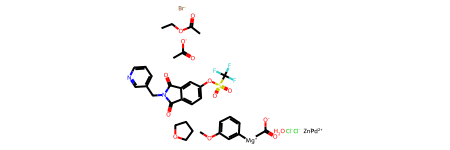

In [105]:
test.iloc[0]['reactants_mol']

In [249]:
detail_save_folder = 'uspto/results_test/'

for sample_method, sample_num, name, model in params:
    
    performance_results = []
    details_results = []

    detail_predict_file = detail_save_folder + 'valid_{}_{}_{}_{}.csv'.format(model, name, sample_num, sample_method)
    log_file = detail_save_folder + 'valid_{}_{}_{}_{}.log'.format(model, name, sample_num, sample_method)
    performance_file = detail_save_folder + 'valid_performance_{}_{}_{}_{}.csv'.format(model, name, sample_num, sample_method)
    print(detail_predict_file)
    
            
    if os.path.exists(performance_file):
        print("{} exits, continue to next params".format(performance_file))
        continue


    # append new date
    # Get the current date and time
    now = datetime.datetime.now()
    # Convert the date and time to a string
    date_time_str = now.strftime("%Y-%m-%d %H:%M:%S")
    with open(log_file, "a") as file:
        file.write("=" * 30 + date_time_str + "=" * 30 + "\n")

    # init var
    predicted_products = []
    
    
    # restore previous data and skip 
    previous_index = []
    if os.path.exists(detail_predict_file):
        previous = pd.read_csv(detail_predict_file)
        previous_index = list(previous['index'])
        
        # previous data => details_results 
        details_results = previous.values.tolist()
        predicted_products = previous[['pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5']].values.tolist()

    # query
    for idx, row in tqdm(test.iterrows()):
        reactant = row['reactants_smiles']
        product = row['products_smiles']
        index = row['index']
        
        if index in previous_index:
            continue

        # ICL examples
        if sample_method == 'Fixed_ICL':
            chunk = train.sample(sample_num, random_state=42)
        elif sample_method == 'Scaffold_SIM':
            sim = top_n_scaffold_similar_molecules(reactant, list(train['scaffold_fp']), list(train['reactants_smiles']), n=sample_num)
            chunk = train[train['reactants_smiles'].isin(sim)]
        examples = list(zip(chunk["reactants_smiles"].values, chunk["products_smiles"].values))

        # build prompt and save
        prompt = create_prompt_final(reactant, examples)
        with open(log_file, "a") as file:
            file.write(prompt + "\n")
            file.write("=" * 50 + "\n")
        
        try:
            # different model 
            if model == 'davinci003':
                predicted_product = generate_response_by_davinci(prompt)
            elif model == 'gpt35':
                predicted_product = generate_response_by_gpt35(prompt)
            elif model == 'gpt4':
                predicted_product = generate_response_by_gpt4(prompt)
        except Exception as e:
            print(e)
            if "Please reduce your prompt; or completion length." in str(e):
                
                try:
                
                    print("using {} icl examples".format(sample_num - 5))

                    # ICL examples
                    if sample_method == 'Fixed_ICL':
                        chunk = train.sample(sample_num-5, random_state=42)
                    elif sample_method == 'Scaffold_SIM':
                        sim = top_n_scaffold_similar_molecules(reactant, list(train['scaffold_fp']), list(train['reactants_smiles']), n=sample_num-5)
                        chunk = train[train['reactants_smiles'].isin(sim)]
                    examples = list(zip(chunk["reactants_smiles"].values, chunk["products_smiles"].values))

                    # build prompt and save
                    prompt = create_prompt_final(reactant, examples)
                    with open(log_file, "a") as file:
                        file.write(prompt + "\n")
                        file.write("=" * 50 + "\n")

                    # different model 
                    if model == 'davinci003':
                        predicted_product = generate_response_by_davinci(prompt)
                    elif model == 'gpt35':
                        predicted_product = generate_response_by_gpt35(prompt)
                    elif model == 'gpt4':
                        predicted_product = generate_response_by_gpt4(prompt)
                except Exception as e:
                    print(e)
                    if "Please reduce your prompt; or completion length." in str(e):
                        print("using {} icl examples".format(sample_num - 10))

                        # ICL examples
                        if sample_method == 'Fixed_ICL':
                            chunk = train.sample(sample_num-10, random_state=42)
                        elif sample_method == 'Scaffold_SIM':
                            sim = top_n_scaffold_similar_molecules(reactant, list(train['scaffold_fp']), list(train['reactants_smiles']), n=sample_num-10)
                            chunk = train[train['reactants_smiles'].isin(sim)]
                        examples = list(zip(chunk["reactants_smiles"].values, chunk["products_smiles"].values))

                        # build prompt and save
                        prompt = create_prompt_final(reactant, examples)
                        with open(log_file, "a") as file:
                            file.write(prompt + "\n")
                            file.write("=" * 50 + "\n")

                        # different model 
                        if model == 'davinci003':
                            predicted_product = generate_response_by_davinci(prompt)
                        elif model == 'gpt35':
                            predicted_product = generate_response_by_gpt35(prompt)
                        elif model == 'gpt4':
                            predicted_product = generate_response_by_gpt4(prompt)
                    else:
                        raise RuntimeError("err")
                
            else:
                raise RuntimeError("err")

        predicted_products.append(predicted_product)
        details_results.append([index, reactant] + [product] + predicted_product)
        
        details_df = pd.DataFrame(details_results, columns=['index', 'reactant', 'product', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5'])
        details_df.to_csv(detail_predict_file, index=False)
        
        # evaluate
        if len(predicted_products) % 50 == 0:
            # evaluate
            acc_list = []
            for repeat in range(5):
                tpredicted_products = [i[repeat] for i in predicted_products]
                correct = 0
                all_sample_num = len(predicted_products)
                for idx, gt in enumerate(list(test.head(all_sample_num)['products_smiles'])):
                    pred = tpredicted_products[idx]
                    try:
                        mol = Chem.MolFromSmiles(pred)
                        pred = Chem.MolToSmiles(mol)
                    except Exception as e:
                        continue

                    pred_list = pred.split(".")
                    if gt in pred_list:
                        correct += 1
                acc = correct / all_sample_num
                acc_list.append(acc)
            print(np.mean(acc_list))
        

    # evaluate
    acc_list = []
    for repeat in range(5):
        tpredicted_products = [i[repeat] for i in predicted_products]
        correct = 0
        all_sample_num = len(test)
        for idx, gt in enumerate(list(test['products_smiles'])):
            pred = tpredicted_products[idx]
            try:
                mol = Chem.MolFromSmiles(pred)
                pred = Chem.MolToSmiles(mol)
            except Exception as e:
                continue

            pred_list = pred.split(".")
            if gt in pred_list:
                correct += 1
        acc = correct / all_sample_num
        acc_list.append(acc)

    # save to file
    performance_results.append([model, name, sample_num, sample_method, np.mean(acc_list)] + acc_list)
    print(performance_results)

    # performance save based on the task
    tem = pd.DataFrame(performance_results, columns=['model', 'name', 'sample_num', 'sample_method', 'avg_metric'] + ['metric_{}'.format(i) for i in range(5)])
    tem.to_csv(performance_file, index=False)

uspto/results_test/valid_gpt4_SMILES_20_Scaffold_SIM.csv


100it [00:00, 1046.83it/s]
[17:45:59] SMILES Parse Error: extra open parentheses for input: 'COc1cccc([Mg+]c1(C=C1c2cc(OS(=O)(=O)C(F)(F)F)cc2C(=O)N1Cc1ccccn1)c1ccccc1C(=O)O'
[17:45:59] Can't kekulize mol.  Unkekulized atoms: 19 20 21 26 28 30 35
[17:45:59] SMILES Parse Error: extra close parentheses while parsing: CC(=O)c1cccc(CONCC)C(F)(F)F)c1
[17:45:59] SMILES Parse Error: Failed parsing SMILES 'CC(=O)c1cccc(CONCC)C(F)(F)F)c1' for input: 'CC(=O)c1cccc(CONCC)C(F)(F)F)c1'
[17:45:59] Can't kekulize mol.  Unkekulized atoms: 9 10 12
[17:45:59] Explicit valence for atom # 3 O, 3, is greater than permitted
[17:45:59] Can't kekulize mol.  Unkekulized atoms: 14 15 16 18 26
[17:45:59] SMILES Parse Error: unclosed ring for input: 'O=S(=O)(CCCCC1C(=O)O)N1CCN(c2ccc(F)cc2)CC1'
[17:45:59] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 25 38 39
[17:45:59] SMILES Parse Error: unclosed ring for input: 'C=C1CC2C3CCC(=O)C3(C)CCC2C2(C)CCC(=O)C3OSO2C132'
[17:45:59] Can't kekulize mol.  Unkekulized at

[['gpt4', 'SMILES', 20, 'Scaffold_SIM', 0.22999999999999998, 0.26, 0.23, 0.24, 0.2, 0.22]]
uspto/results_test/valid_davinci003_SMILES_20_Scaffold_SIM.csv


100it [00:00, 15031.19it/s]
[17:45:59] Explicit valence for atom # 10 Na, 2, is greater than permitted
[17:45:59] SMILES Parse Error: unclosed ring for input: 'C=C1CC2C3CCC(=O)C3(C)CCC2C2(C)CCC(=O)C3OC1C2O'
[17:45:59] Can't kekulize mol.  Unkekulized atoms: 7 8 9 11 12 13 14
[17:45:59] Explicit valence for atom # 7 O, 3, is greater than permitted
[17:45:59] Explicit valence for atom # 26 Cl, 2, is greater than permitted
[17:45:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:45:59] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[17:45:59] Explicit valence for atom # 12 O, 3, is greater than permitted
[17:45:59] Explicit valence for atom # 15 N, 5, is greater than permitted
[17:45:59] Explicit valence for atom # 7 O, 3, is greater than permitted
[17:45:59] Explicit valence for atom # 9 F, 2, is greater than permitted
[17:45:59] Explicit valence for atom # 12 N, 4, is greater than permitted
[17:45:59] Explicit valence for atom # 13 O, 3, is greater than permitted


[['davinci003', 'SMILES', 20, 'Scaffold_SIM', 0.21800000000000003, 0.21, 0.23, 0.22, 0.21, 0.22]]
uspto/results_test/valid_gpt35_SMILES_20_Scaffold_SIM.csv


100it [00:00, 15891.13it/s]
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 30 31 32 35 36
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 7
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 14
[17:46:00] SMILES Parse Error: unclosed ring for input: 'C=C1CC2C3CCC(=O)C3(C)CCC2C2(C)CCC(=O)C3OS(O)(=O)=O1'
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 12 13 17 19
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 14 15
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 9 10 17
[17:46:00] non-ring atom 1 marked aromatic
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14 24 25
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6 8 9 10 11
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[17:46:00] Explicit valence for atom # 10 O, 3, is greater than permitted
[17:46:00] Explicit valence for atom # 3 O, 3, is greater than permitted
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10
[17:46:00] SMILES Parse

[['gpt35', 'SMILES', 20, 'Scaffold_SIM', 0.184, 0.19, 0.18, 0.19, 0.18, 0.18]]
uspto/results_test/valid_gpt4_SMILES_5_Scaffold_SIM.csv


100it [00:00, 15412.87it/s]
[17:46:00] SMILES Parse Error: extra open parentheses for input: 'COc1cccc(C2(C(=O)N(CC3CCCCO3)C(=O)c3ccccc32)c1'
[17:46:00] Explicit valence for atom # 25 O, 5, is greater than permitted
[17:46:00] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:46:00] SMILES Parse Error: unclosed ring for input: 'BrC2CCCCN2.CCN(CC)CC.N#Cc1cc(CC(N1CCOCC1)c2)cc([N+](=O)[O-])c1'
[17:46:00] Explicit valence for atom # 8 N, 4, is greater than permitted
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6 8 9 10 11
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 7 12 13 14
[17:46:00] SMILES Parse Error: unclosed ring for input: 'CC(=O)Oc1cccc(C(=O)N[C@@H](CSc2ccccc2)C(O)CN1CC1CCCCC1)c1C'
[17:46:00] Explicit valence for atom # 7 O, 3, is greater than permitted
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 23 24 25
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 6 8 9 10 11
[17:46:00] SMILES Parse Error: unclosed r

[['gpt4', 'SMILES', 5, 'Scaffold_SIM', 0.182, 0.16, 0.2, 0.18, 0.19, 0.18]]
uspto/results_test/valid_gpt4_SMILES_20_Fixed_ICL.csv


100it [00:00, 15878.49it/s]
[17:46:00] SMILES Parse Error: extra open parentheses for input: 'CC(C)(C)OC(=O)NC1CCN(CCN2C(=O)COc3ccc(Br)cc32)CC1.N#Cc1ccc2ccc(=O)n(CCN3CCC(N(CC(=O)c4ccc(Br)cc4)CC3)c2c1'
[17:46:00] Explicit valence for atom # 22 C, 6, is greater than permitted
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 9
[17:46:00] Explicit valence for atom # 15 O, 3, is greater than permitted
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 10 11 12 14 15 16 17 22 23
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[17:46:00] SMILES Parse Error: syntax error while parsing: COc1c(F)cc(-c2ccc(C(F)(F)F)cc2)cc1C(Cr(=O)(=O)O)c1cc[nH]cc1
[17:46:00] SMILES Parse Error: Failed parsing SMILES 'COc1c(F)cc(-c2ccc(C(F)(F)F)cc2)cc1C(Cr(=O)(=O)O)c1cc[nH]cc1' for input: 'COc1c(F)cc(-c2ccc(C(F)(F)F)cc2)cc1C(Cr(=O)(=O)O)c1cc[nH]cc1'
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 2 3 4 14
[17:46:00] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 14
[17:46:00] SMIL

[['gpt4', 'SMILES', 20, 'Fixed_ICL', 0.012, 0.01, 0.02, 0.01, 0.02, 0.0]]


# gpt-4 zero-shot on test

In [264]:
def create_zero_shot_prompt(input_text):
    prompt = "You are an expert chemist. Given the reactants SMILES: {}, predict the reaction product SMILES using your experienced chemical Reaction Prediction knowledge. No explanations and other information. \
Only return the product SMILES.".format(input_text)
    return prompt

In [266]:
model = 'gpt4'

In [267]:
detail_save_folder = 'uspto/results_test/'

performance_results = []
details_results = []

detail_predict_file = detail_save_folder + '{}_zero_shot.csv'.format(model)
log_file = detail_save_folder + '{}_zero_shot.log'.format(model)
performance_file = detail_save_folder + '{}_zero_shot_performance.csv'.format(model)
print(detail_predict_file)

if os.path.exists(performance_file):
    print("{} exits, continue to next params".format(performance_file))
    raise RuntimeError("exist")

# append new date
# Get the current date and time
now = datetime.datetime.now()
# Convert the date and time to a string
date_time_str = now.strftime("%Y-%m-%d %H:%M:%S")
with open(log_file, "a") as file:
    file.write("=" * 30 + date_time_str + "=" * 30 + "\n")

# init var
predicted_products = []


# restore previous data and skip 
previous_index = []
if os.path.exists(detail_predict_file):
    previous = pd.read_csv(detail_predict_file)
    previous_index = list(previous['index'])

    # previous data => details_results 
    details_results = previous.values.tolist()
    predicted_products = previous[['pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5']].values.tolist()

# query
for idx, row in tqdm(test.iterrows()):
    reactant = row['reactants_smiles']
    product = row['products_smiles']
    index = row['index']

    if index in previous_index:
        continue

    # build prompt and save
    prompt = create_zero_shot_prompt(reactant)
    with open(log_file, "a") as file:
        file.write(prompt + "\n")
        file.write("=" * 50 + "\n")

    if model == 'davinci003':
        predicted_product = generate_response_by_davinci(prompt)
    elif model == 'gpt35':
        predicted_product = generate_response_by_gpt35(prompt)
    elif model == 'gpt4':
        predicted_product = generate_response_by_gpt4(prompt)

    predicted_products.append(predicted_product)
    details_results.append([index, reactant] + [product] + predicted_product)

    details_df = pd.DataFrame(details_results, columns=['index', 'reactant', 'product', 'pred_1', 'pred_2', 'pred_3', 'pred_4', 'pred_5'])
    details_df.to_csv(detail_predict_file, index=False)

# evaluate
acc_list = []
for repeat in range(5):
    tpredicted_products = [i[repeat] for i in predicted_products]
    correct = 0
    all_sample_num = len(test)
    for idx, gt in enumerate(list(test['products_smiles'])):
        pred = tpredicted_products[idx]
        try:
            mol = Chem.MolFromSmiles(pred)
            pred = Chem.MolToSmiles(mol)
        except Exception as e:
            continue

        pred_list = pred.split(".")
        if gt in pred_list:
            correct += 1
    acc = correct / all_sample_num
    acc_list.append(acc)

# save to file
performance_results.append([np.mean(acc_list)] + acc_list)
print(performance_results)

# performance save based on the task
tem = pd.DataFrame(performance_results, columns=['avg_metric'] + ['metric_{}'.format(i) for i in range(5)])
tem.to_csv(performance_file, index=False)

uspto/results_test/gpt4_zero_shot.csv


100it [19:00, 11.41s/it]
[22:40:21] SMILES Parse Error: syntax error while parsing: Brc1nccs1.C1CCOC1.CC(C)(O)CCO.CCc1c(Cn2ccnc2-c2nccs2)sectiondiv]nc2ccc(Cl)nn12
[22:40:21] SMILES Parse Error: Failed parsing SMILES 'Brc1nccs1.C1CCOC1.CC(C)(O)CCO.CCc1c(Cn2ccnc2-c2nccs2)sectiondiv]nc2ccc(Cl)nn12' for input: 'Brc1nccs1.C1CCOC1.CC(C)(O)CCO.CCc1c(Cn2ccnc2-c2nccs2)sectiondiv]nc2ccc(Cl)nn12'
[22:40:21] SMILES Parse Error: syntax error while parsing: CN(C)C(=O)Cc1nc(CCl)cs1.COc1cccc(N)c1.K+[O-][C-]([O-])O[K+]
[22:40:21] SMILES Parse Error: Failed parsing SMILES 'CN(C)C(=O)Cc1nc(CCl)cs1.COc1cccc(N)c1.K+[O-][C-]([O-])O[K+]' for input: 'CN(C)C(=O)Cc1nc(CCl)cs1.COc1cccc(N)c1.K+[O-][C-]([O-])O[K+]'
[22:40:21] Explicit valence for atom # 23 B, 4, is greater than permitted
[22:40:21] SMILES Parse Error: syntax error while parsing: C1CCOC1.CC(=O)Oc1ccc(C2=COc3ccccc3O2)cc1.CO.KOC(=O)[O-].KOC(=O)[O-]
[22:40:21] SMILES Parse Error: Failed parsing SMILES 'C1CCOC1.CC(=O)Oc1ccc(C2=COc3ccccc3O2)cc1.CO.KOC(=

[22:40:21] SMILES Parse Error: syntax error while parsing: Cc1ccccc1N(C)C(=O)C(Cn1nnc2ccccc21)Nc1ccccc1.NC(=O)C(N)c1ccccc1.CS(=O)(=O)[O].[Na].BuCl
[22:40:21] SMILES Parse Error: Failed parsing SMILES 'Cc1ccccc1N(C)C(=O)C(Cn1nnc2ccccc21)Nc1ccccc1.NC(=O)C(N)c1ccccc1.CS(=O)(=O)[O].[Na].BuCl' for input: 'Cc1ccccc1N(C)C(=O)C(Cn1nnc2ccccc21)Nc1ccccc1.NC(=O)C(N)c1ccccc1.CS(=O)(=O)[O].[Na].BuCl'
[22:40:21] Explicit valence for atom # 11 F, 4, is greater than permitted
[22:40:21] SMILES Parse Error: unclosed ring for input: 'C1(=NC(=C(S1)N1CCCCC1)N1CCCCC1)c1ccccc1.C1(=O)OC(C)(C)C(=O)N1CCC(c2ccccc2)CC1.CN(C)c1ccccn1'
[22:40:21] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 23 24 45 46
[22:40:21] SMILES Parse Error: syntax error while parsing: CC(C)(C)OC(=O)NC1(c2ccc(-c3c(-c4ccccc4)oc4ccc(F)cc4c3=O)cc2)CCC1.COc1cc2oc(-c3ccccc3)c(I)c(=O)c2cc1C>>CC(C)(C)OC(=O)NC1(c2ccc(-c3c(-c4ccccc4)oc4ccc(F)cc4c3=O)cc2)CCC1.CCc1cc2oc(-c3ccccc3)c(I)c(=O)c2cc1OC
[22:40:21] SMILES Parse Error: Failed parsing

[[0.004, 0.0, 0.01, 0.01, 0.0, 0.0]]


[22:40:21] SMILES Parse Error: syntax error while parsing: CC(C)(C)OC1CCOC1.N(C)C=O.K[Cu](Cl)(Cl)Cl.O=[N+]([O-])c1ccc(-c2ccc(Cl)cc2)cc1
[22:40:21] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)OC1CCOC1.N(C)C=O.K[Cu](Cl)(Cl)Cl.O=[N+]([O-])c1ccc(-c2ccc(Cl)cc2)cc1' for input: 'CC(C)(C)OC1CCOC1.N(C)C=O.K[Cu](Cl)(Cl)Cl.O=[N+]([O-])c1ccc(-c2ccc(Cl)cc2)cc1'
[22:40:21] SMILES Parse Error: syntax error while parsing: FC1=CC=CC(SC2=CCNCC2)=C1N(CC)CC(CC)C.CC.Cl+C(Cl)Cl+C(Cl)C(Cl)Cl.O=C(Cl)C1=CC=CC(NC2=CC=NC3=CC=CC(C(F)(F)F)=C23)=C1
[22:40:21] SMILES Parse Error: Failed parsing SMILES 'FC1=CC=CC(SC2=CCNCC2)=C1N(CC)CC(CC)C.CC.Cl+C(Cl)Cl+C(Cl)C(Cl)Cl.O=C(Cl)C1=CC=CC(NC2=CC=NC3=CC=CC(C(F)(F)F)=C23)=C1' for input: 'FC1=CC=CC(SC2=CCNCC2)=C1N(CC)CC(CC)C.CC.Cl+C(Cl)Cl+C(Cl)C(Cl)Cl.O=C(Cl)C1=CC=CC(NC2=CC=NC3=CC=CC(C(F)(F)F)=C23)=C1'
[22:40:21] SMILES Parse Error: syntax error while parsing: COC(=O)C(Br)c1ccc(Sc2ccc(Cl)cc2)cc1.Oc1ccc(Cl)cc1>>COC(=O)C(B(Oc1ccc(Cl)cc1))c1ccc(Sc2ccc(Cl)cc2)cc1
[22:40:21]